In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.models import Model

#import tensorflow libraries 
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

from keras.models import Sequential

from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv("data/cleaned_data1.csv")

In [3]:
X = df.drop(columns=["PCOS (Y/N)"])
y = df["PCOS (Y/N)"].values

# implementing train-test-split
train_features, test_features, train_target, test_target = train_test_split(X, y, test_size=0.33, random_state=13)

In [4]:
from sklearn.preprocessing import StandardScaler
S = StandardScaler()
train_features = S.fit_transform(train_features)
test_features = S.fit_transform(test_features)

Dimensionality Reduction using AutoEncoders

In [5]:
encoding_dim = 10

input_df = Input(shape=(37,))
encoded = Dense(encoding_dim, activation='relu')(input_df)
decoded = Dense(37, activation='relu')(encoded)

# encoder
autoencoder = Model(input_df, decoded)

# intermediate result
encoder = Model(input_df, encoded)

Apply ANN on reduced dimensional features

In [6]:
encoded_train_features = encoder.predict(train_features)
encoded_test_features = encoder.predict(test_features)

In [7]:
n_features = encoded_train_features.shape[1]
n_features

10

In [8]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(n_features,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
n_epochs = 100
rmsprop = tf.keras.optimizers.RMSprop(learning_rate=0.0001)

#Compile the model
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
#fit the model
history2 = model.fit(encoded_train_features, train_target, epochs=n_epochs,validation_data=(encoded_test_features,test_target), batch_size=32, verbose=0)

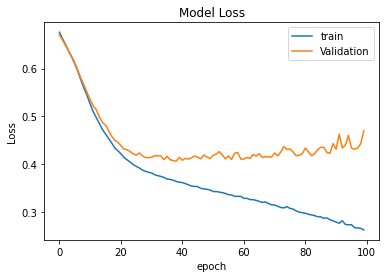

In [10]:
plt.plot(history2.history['loss'],label='Training Loss')
plt.plot(history2.history['val_loss'],label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train','Validation'],loc='upper right')
plt.show()

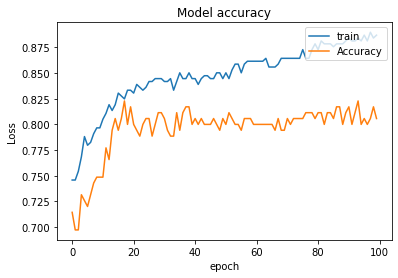

In [11]:
plt.plot(history2.history['accuracy'],label='Training accuracy')
plt.plot(history2.history['val_accuracy'],label='Validation accuracy')
plt.title('Model accuracy')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train','Accuracy'],loc='upper right')
plt.show()

In [12]:
loss, acc = model.evaluate(encoded_test_features, test_target, verbose=0)
print('Test Accuracy: %.3f' %(acc * 100.0))

Test Accuracy: 80.571


In [13]:

prediction = model.predict(encoded_test_features)
data = []
for x in prediction:
    # if the weights >0.5 then classified as 1 else classified as 0
    if x[0] > 0.5:
        data.append(1)
    else:
        data.append(0)

cnf_matrix = confusion_matrix(test_target, data)
cnf_matrix

array([[107,   8],
       [ 26,  34]], dtype=int64)

In [14]:
print('ANN : \n', classification_report(test_target, data),'\n')

ANN : 
               precision    recall  f1-score   support

           0       0.80      0.93      0.86       115
           1       0.81      0.57      0.67        60

    accuracy                           0.81       175
   macro avg       0.81      0.75      0.76       175
weighted avg       0.81      0.81      0.80       175
 



In [15]:
#Validation

from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate RMSE
RMSE_test = sqrt(mean_squared_error(test_target, prediction)) 

#Traning

from sklearn.metrics import mean_squared_error
from math import sqrt
train_prediction = model.predict(encoded_train_features)
#calculate RMSE
RMSE_train = sqrt(mean_squared_error(train_target, train_prediction))

print('Traning RMSE: %.4f'%RMSE_train)
print('\n')
print('Testing RMSE: %.4f'%RMSE_test)

Traning RMSE: 0.2868


Testing RMSE: 0.3803


In [16]:
#Validation

from sklearn.metrics import mean_absolute_error
from math import sqrt

#calculate RMSE
MAE_test = mean_absolute_error(test_target, prediction)

#Traning

from sklearn.metrics import mean_squared_error
from math import sqrt
train_prediction = model.predict(encoded_train_features)
#calculate RMSE
MAE_train = sqrt(mean_squared_error(train_target, train_prediction))

print('Traning MAE: %.4f'%MAE_train)
print('\n')
print('Testing MAE: %.4f'%MAE_test)

Traning MAE: 0.2868


Testing MAE: 0.2345
